<font size = "5">

 Final  Project 
 QTM 151, Fall 2023

<font size = "3">

- By  Christina Xu, Shawn Chen, Shan Lu
- Merge the tables "lap_times" (primary) and "drivers" (secondary) <br>
on "driverId" using ```LEFT JOIN``` on "driverId".

HINT: Include \\"driverId\\" in double quotations with an <br>
escape character (see Lecture 20 for details) since <br>
it has a mix of upper and lower case letters

<font size = "5">

 Introduction

<font size = "3">

In [3]:
#importing packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl # visualizations
import matplotlib.pyplot as plt 


In [ ]:
#importing datasets
#constructor tables
con_results=pd.read_csv("raw_data\constructor_results.csv")
constructor=pd.read_csv("raw_data\constructors.csv")
constructor_standings=pd.read_csv("raw_data\constructor_standings.csv")
#drivers table
drivers=pd.read_csv("raw_data\drivers.csv")
#pit_stops
pit_stops=pd.read_csv("raw_data\pit_stops.csv")
#results table
results  = pd.read_csv("raw_data/results.csv")
#races table
races    = pd.read_csv("raw_data/races.csv")

#pit stops
pit_stops=pd.read_csv("raw_data\pit_stops.csv")



In [ ]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [ ]:
#check datatype of pit_stops

#rename column [milliseconds] into [stop_milliseconds]
pit_stops = pit_stops.rename(columns={'milliseconds': 'stopinmilliseconds'})
print(pit_stops.dtypes)
display(pit_stops)


raceId                 int64
driverId               int64
stop                   int64
lap                    int64
time                  object
duration              object
stopinmilliseconds     int64
dtype: object


,raceId,driverId,stop,lap,time,duration,stopinmilliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [ ]:
pit_stops["stopinmilliseconds"]

0       26898
1       25021
2       23426
3       23251
4       23842
        ...  
9629    25174
9630    21802
9631    21734
9632    21559
9633    23159
Name: stopinmilliseconds, Length: 9634, dtype: int64

In [ ]:

# merging pit_stop with results 

pitsstop_drivers_merge=pd.merge(results,
                      pit_stops[["stopinmilliseconds","stop"]],
                        on="driverId",
                       how = "cross")





KeyError: "['stop_milliseconds'] not in index"

Data cleaning:

In [ ]:
#selecting the top 3 drivers that has the fastests Finishing time across time.

#checkng the type of variables in result table
results.dtypes

len(results)
len(results['milliseconds'].unique())


descriptives_singleline = (results["milliseconds"]
                           .describe())
results.subset=results





count     25840
unique     7051
top          \N
freq      18753
Name: milliseconds, dtype: object

In [ ]:
subset=results.query("milliseconds.str.isnumeric()==False")
list_unique=pd.unique(subset["milliseconds"])
print(list_unique)
list_old=['\\N']
list_new=[0]
results["milliseconds"]=results["milliseconds"].replace(list_old,list_new)
results["milliseconds_numeric"] = pd.to_numeric(results["milliseconds"])
results=results.query('milliseconds_numeric >0')
results.to_csv("raw_data/results.csv")
gb_results=(results.groupby("raceId"))
raceResults=gb_results.apply(lambda x: x.sort_values(by='milliseconds_numeric'))


pit_stops = pit_stops.rename(columns={'milliseconds': 'stopinmilliseconds'})
print(pit_stops.dtypes)
display(pit_stops)



['\\N']
raceId                 int64
driverId               int64
stop                   int64
lap                    int64
time                  object
duration              object
stopinmilliseconds     int64
dtype: object


,raceId,driverId,stop,lap,time,duration,stopinmilliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [ ]:

drivers_merge_results=pd.merge(drivers[['driverId','driverRef','nationality']],
                              raceResults[['resultId','raceId','driverId','constructorId','number','grid','position','positionText','positionOrder','points','laps','time','milliseconds_numeric','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId']],
                          on="driverId",
                          how="right")
with_pitstop_results=pd.merge(pit_stops[["stopinmilliseconds","stop",'driverId']],
                               drivers_merge_results[['resultId','milliseconds_numeric','laps','raceId','driverId','nationality','constructorId','points']],
                          on="driverId",
                          how="outer")


final_results=pd.merge(constructor[['constructorId',"name"]],
                      with_pitstop_results[["stopinmilliseconds","stop",'resultId','milliseconds_numeric','laps','raceId','driverId','nationality','constructorId','points']],
                          on="constructorId",
                          how="right")


print(final_results.dtypes)


constructorId           float64
name                     object
stopinmilliseconds      float64
stop                    float64
resultId                float64
milliseconds_numeric    float64
laps                    float64
raceId                  float64
driverId                  int64
nationality              object
points                  float64
dtype: object


In [ ]:
#Query + group by


fastest_drivers_per_race = final_results.groupby('raceId').apply(lambda x: x.sort_values('milliseconds_numeric').head(3))
fastest_drivers_per_race

constructorId      name  stopinmilliseconds  stop  resultId  \
raceId                                                                       
1.0    492236           23.0     Brawn             23788.0   2.0    7554.0   
       497096           23.0     Brawn             24532.0   2.0    7554.0   
       496934           23.0     Brawn           1136054.0   1.0    7554.0   
2.0    482841           23.0     Brawn             25138.0   1.0    7574.0   
       497907           23.0     Brawn             23546.0   2.0    7574.0   
...                      ...       ...                 ...   ...       ...   
1095.0 974309          131.0  Mercedes             20742.0   2.0   25806.0   
       974339          131.0  Mercedes             21363.0   3.0   25806.0   
1096.0 906981            9.0  Red Bull             22766.0   4.0   25826.0   
       882106            9.0  Red Bull             24078.0   3.0   25826.0   
       882231            9.0  Red Bull             22309.0   1.0   25826.0   

               milliseconds_numeric  laps  raceId  driverId nationality  \
raceId                                                                    
1.0    492236             5655784.0  58.0     1.0        18     British   
       497096             5655784.0  58.0     1.0        18     British   
       496934             5655784.0  58.0     1.0        18     British   
2.0    482841             4252092.0  31.0     2.0        18     British   
       497907             4252092.0  31.0     2.0        18     British   
...                             ...   ...     ...       ...         ...   
1095.0 974309             5914044.0  71.0  1095.0       847     British   
       974339             5914044.0  71.0  1095.0       847     British   
1096.0 906981             5265914.0  58.0  1096.0       830       Dutch   
       882106             5265914.0  58.0  1096.0       830       Dutch   
       882231             5265914.0  58.0  1096.0       830       Dutch   

               points  
raceId                 
1.0    492236    10.0  
       497096    10.0  
       496934    10.0  
2.0    482841     5.0  
       497907     5.0  
...               ...  
1095.0 974309    26.0  
       974339    26.0  
1096.0 906981    25.0  
       882106    25.0  
       882231    25.0  

[3092 rows x 11 columns]

In [ ]:
with_pitstop_results

,stopinmilliseconds,stop,driverId,resultId,milliseconds_numeric,laps,raceId,nationality,constructorId,points
0,26898.0,1.0,153,20335.0,6053052.0,49.0,337.0,Spanish,5.0,0.0
1,26898.0,1.0,153,20357.0,5687832.0,58.0,338.0,Spanish,5.0,0.0
2,26898.0,1.0,153,20379.0,5699014.0,56.0,339.0,Spanish,5.0,2.0
3,26898.0,1.0,153,20407.0,6473579.0,56.0,340.0,Spanish,5.0,0.0
4,26898.0,1.0,153,20453.0,6622490.0,78.0,342.0,Spanish,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
982958,NaN,NaN,786,20133.0,10698500.0,64.0,838.0,Italian,51.0,6.0
982959,NaN,NaN,786,20152.0,10373000.0,80.0,839.0,Italian,51.0,4.0
982960,NaN,NaN,686,20027.0,8055600.0,70.0,833.0,British,51.0,4.0
982961,NaN,NaN,627,20120.0,10185000.0,35.0,837.0,French,154.0,4.0


In [ ]:
pit_stops



total_pit_stop_time_per_driver_per_race = pit_stops.groupby(['raceId', 'driverId'])['stopinmilliseconds'].sum()

print(total_pit_stop_time_per_driver_per_race)
total_pit_stop_time_per_driver_per_race.std()

raceId  driverId
841     1           46426
        2           48092
        3           23716
        4           72165
        5           24865
                    ...  
1096    848         43591
        849         47597
        852         43853
        854         45806
        855         45594
Name: stopinmilliseconds, Length: 4701, dtype: int64


439625.05111637857

In [45]:
# Merging the Datasets
drivers=pd.read_csv("raw_data\drivers.csv")
#pit_stops
pit_stops_df=pd.read_csv("raw_data\pit_stops.csv")
#results table
results_df  = pd.read_csv("raw_data/results.csv")
#races table
races_df    = pd.read_csv("raw_data/races.csv")

#pit stops
pit_stops=pd.read_csv("raw_data\pit_stops.csv")



# Renaming the 'milliseconds' column in the pit_stops dataframe to 'stopmilliseconds'
pit_stops_df_renamed = pit_stops_df.rename(columns={'milliseconds': 'stopmilliseconds'})

# Merging the datasets
# First, merge races and results datasets on 'raceId'
merged_df = pd.merge(races_df, results_df, on='raceId')

# Then, merge the result with the pit stops dataset (with renamed column) on 'raceId' and 'driverId'
final_merged_df = pd.merge(merged_df, pit_stops_df_renamed, on=['raceId', 'driverId'])

# Calculating the sum of pit stop times for each driver in each race
pit_stops_sum_df = final_merged_df.groupby(['raceId', 'driverId'])['stopmilliseconds'].mean().reset_index()

# Merging the sum of pit stop times with the races and results data
merged_df = pd.merge(final_merged_df, pit_stops_sum_df, on=['raceId', 'driverId'], suffixes=('', '_sum'))

# Sorting values by year and date to get races in chronological order
merged_df_sorted = merged_df.sort_values(by=['year', 'date', 'raceId'])

# Creating a shifted dataframe to find the next race for each driver in the same season
merged_df_sorted['next_raceId'] = merged_df_sorted.groupby(['year', 'driverId'])['raceId'].shift(-1)
merged_df_sorted['next_positionOrder'] = merged_df_sorted.groupby(['year', 'driverId'])['positionOrder'].shift(-1)

# Filtering out rows where the next raceId is NaN (i.e., the last race of the season for that driver)
analysis_df = merged_df_sorted.dropna(subset=['next_raceId'])

# Selecting relevant columns for regression analysis
regression_df = analysis_df[['year', 'driverId', 'raceId', 'stopmilliseconds_sum', 'next_raceId', 'next_positionOrder']]

# Displaying the prepared dataframe for regression analysis
regression_df.head(10)


,year,driverId,raceId,stopmilliseconds_sum,next_raceId,next_positionOrder
0,2011,20,841,23319.500000,841.0,1.0
1,2011,20,841,23319.500000,842.0,1.0
2,2011,1,841,23213.000000,841.0,2.0
3,2011,1,841,23213.000000,842.0,8.0
4,2011,808,841,25109.000000,841.0,3.0
5,2011,808,841,25109.000000,843.0,9.0
6,2011,4,841,24055.000000,841.0,4.0
7,2011,4,841,24055.000000,841.0,4.0
8,2011,4,841,24055.000000,842.0,6.0
9,2011,17,841,24058.666667,841.0,5.0


In [46]:
# Redoing the process from sorting the merged dataframe by year, date, and raceId

# Sorting values by year and date to get races in chronological order
merged_df_sorted = merged_df.sort_values(by=['year', 'date', 'raceId'])

# Creating a shifted dataframe to find the next race for each driver in the same season
merged_df_sorted['next_raceId'] = merged_df_sorted.groupby(['year', 'driverId'])['raceId'].shift(-1)
merged_df_sorted['next_positionOrder'] = merged_df_sorted.groupby(['year', 'driverId'])['positionOrder'].shift(-1)

# Filtering out rows where the next raceId is NaN (the last race of the season for that driver)
analysis_df = merged_df_sorted.dropna(subset=['next_raceId'])

# Ensuring that the 'raceId' and 'next_raceId' are different
analysis_df = analysis_df[analysis_df['raceId'] != analysis_df['next_raceId']]

# Further filtering to include only rows where next_raceId is a raceId in the dataset for the same driver and season
filtered_df = analysis_df[analysis_df.apply(lambda row: 
                    ((analysis_df.year == row['year']) & 
                     (analysis_df.driverId == row['driverId']) & 
                     (analysis_df.raceId == row['next_raceId'])).any(), axis=1)]

regression_df_final = filtered_df[['year', 'driverId', 'raceId', 'stopmilliseconds_sum', 'next_raceId', 'next_positionOrder']]
# Grouping the final dataframe by driverId and displaying a few records for each driver
grouped_by_driver_final = regression_df_final.groupby('driverId')
grouped_by_driver_sample_final = {driver: data.head(2) for driver, data in grouped_by_driver_final}
grouped_by_driver_sample_df_final = pd.concat(grouped_by_driver_sample_final.values())
grouped_by_driver_sample_df_final.sort_values(by=[ 'driverId']).head(10)  # Displaying the first 10 rows for illustration purposes


,year,driverId,raceId,stopmilliseconds_sum,next_raceId,next_positionOrder
3,2011,1,841,23213.000000,842.0,8.0
43,2011,1,842,23252.750000,843.0,1.0
26,2011,2,842,23241.000000,843.0,12.0
81,2011,2,843,22018.500000,844.0,7.0
66,2011,3,843,21165.333333,844.0,5.0
106,2011,3,844,21189.250000,847.0,11.0
8,2011,4,841,24055.000000,842.0,6.0
37,2011,4,842,24510.000000,843.0,7.0
722,2012,5,867,22742.500000,873.0,15.0
492,2012,8,860,24095.500000,861.0,5.0


In [47]:
#creating a dataset that 
analysis_grouped_by_driver_sample_final= {driver: data.head(1) for driver, data in grouped_by_driver_final}
analysis_grouped_by_driver_sample_df_final= pd.concat(analysis_grouped_by_driver_sample_final.values())
analysis_grouped_by_driver_sample_df_final.sort_values(by=[ 'driverId']).head(30)

,year,driverId,raceId,stopmilliseconds_sum,next_raceId,next_positionOrder
3,2011,1,841,23213.000000,842.0,8.0
26,2011,2,842,23241.000000,843.0,12.0
66,2011,3,843,21165.333333,844.0,5.0
8,2011,4,841,24055.000000,842.0,6.0
722,2012,5,867,22742.500000,873.0,15.0
492,2012,8,860,24095.500000,861.0,5.0
17,2011,13,841,24145.666667,842.0,5.0
52,2011,16,842,25430.000000,849.0,11.0
11,2011,17,841,24058.666667,842.0,4.0
14,2011,18,841,20950.333333,842.0,2.0


In [48]:
# Correcting the process to find the next race for each driver in the same season

# Dropping any previous columns related to the next race that might have been incorrectly calculated
if 'next_raceId' in merged_df_sorted.columns:
    merged_df_sorted = merged_df_sorted.drop(columns=['next_raceId', 'next_positionOrder'])

# Creating a new shifted dataframe to find the next race for each driver in the same season
# We shift the 'raceId' and 'positionOrder' within the group defined by each driverId and year
merged_df_sorted['next_raceId'] = merged_df_sorted.groupby(['year', 'driverId'])['raceId'].shift(-1)
merged_df_sorted['next_positionOrder'] = merged_df_sorted.groupby(['year', 'driverId'])['positionOrder'].shift(-1)

# Removing the rows where the next raceId is NaN (the last race of the season for that driver)
analysis_df_corrected = merged_df_sorted.dropna(subset=['next_raceId'])

# Ensuring that the 'raceId' and 'next_raceId' are not the same
analysis_df_corrected = analysis_df_corrected[analysis_df_corrected['raceId'] != analysis_df_corrected['next_raceId']]

# Selecting relevant columns for regression analysis
regression_df_corrected = analysis_df_corrected[['year', 'driverId', 'raceId', 'stopmilliseconds_sum', 'next_raceId', 'next_positionOrder']]

# Displaying a sample of the corrected dataframe
regression_df_corrected.head(10)


,year,driverId,raceId,stopmilliseconds_sum,next_raceId,next_positionOrder
1,2011,20,841,23319.500000,842.0,1.0
3,2011,1,841,23213.000000,842.0,8.0
5,2011,808,841,25109.000000,843.0,9.0
8,2011,4,841,24055.000000,842.0,6.0
11,2011,17,841,24058.666667,842.0,4.0
14,2011,18,841,20950.333333,842.0,2.0
17,2011,13,841,24145.666667,842.0,5.0
20,2011,20,842,22408.333333,843.0,2.0
23,2011,18,842,22451.333333,843.0,4.0
26,2011,2,842,23241.000000,843.0,12.0


21996.0

28097.5

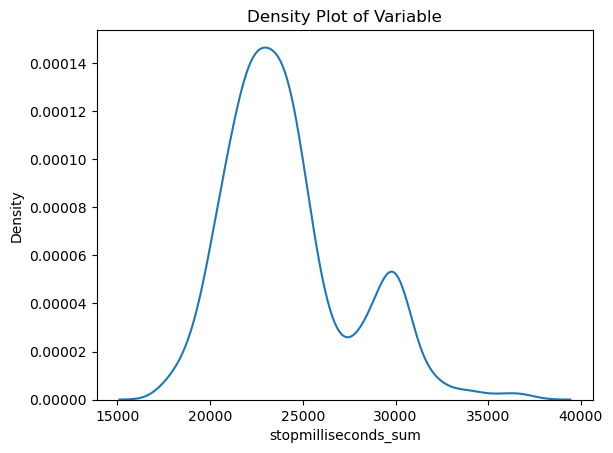

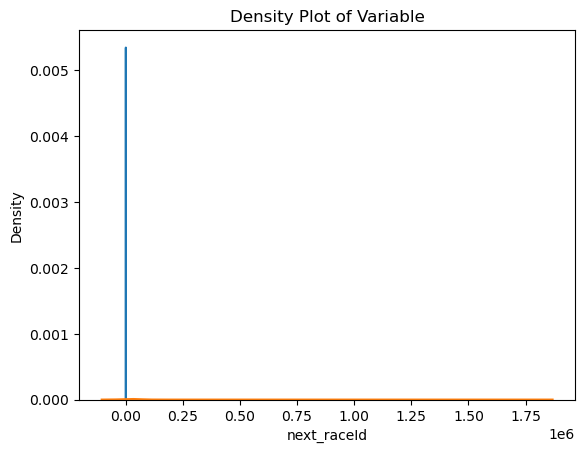

<Axes: xlabel='stopmilliseconds_sum', ylabel='Density'>

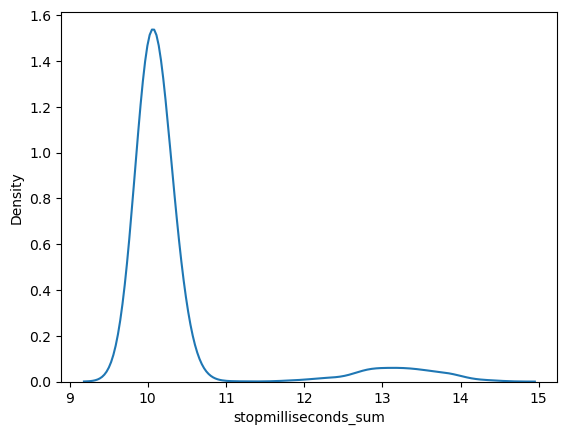

In [57]:
import seaborn as sns
Q1= regression_df_corrected['stopmilliseconds_sum'].quantile(0.25)
display(Q1)
Q3= regression_df_corrected['stopmilliseconds_sum'].quantile(0.75)
display(Q3)


IQR = Q3 - Q1
regression_df_corrected_filtered = regression_df_corrected[(regression_df_corrected['stopmilliseconds_sum'] >= Q1 - 1.5 * IQR) & (regression_df_corrected['stopmilliseconds_sum'] <= Q3 + 1.5 * IQR)]
sns.kdeplot(regression_df_corrected_filtered['stopmilliseconds_sum'])
plt.title('Density Plot of Variable')
plt.show()



sns.kdeplot(regression_df_corrected['stopmilliseconds_sum'])
plt.title('Density Plot of Variable')
plt.show()



log_data = np.log(regression_df_corrected['stopmilliseconds_sum'])

sns.kdeplot(log_data)


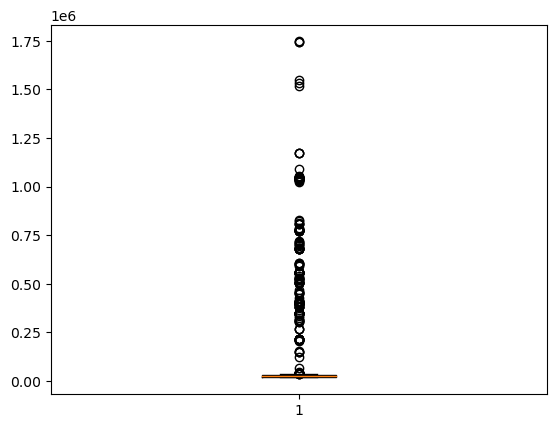

75364.68659339017
190183.6423051882
23843.0


20610.1

35132.700000000004

In [54]:
import matplotlib.pyplot as plt

plt.boxplot(regression_df_corrected['stopmilliseconds_sum'])
plt.show()


mean = regression_df_corrected['stopmilliseconds_sum'].mean()
std_dev = regression_df_corrected['stopmilliseconds_sum'].std()
median = regression_df_corrected['stopmilliseconds_sum'].median()
print(mean)
print(std_dev)

print(median)

#new_regression_df_corrected['stopmilliseconds_sum']=np.log(regression_df_corrected['stopmilliseconds_sum'])




Q1= regression_df_corrected['stopmilliseconds_sum'].quantile(0.1)
display(Q1)
Q2= regression_df_corrected['stopmilliseconds_sum'].quantile(0.90)
display(Q2)

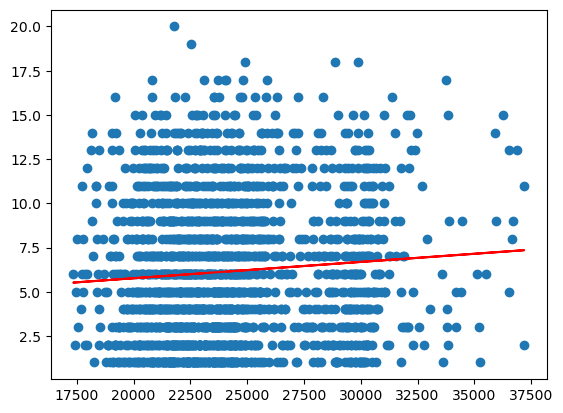

In [61]:
#regression 



x= regression_df_corrected_filtered['stopmilliseconds_sum']
y= regression_df_corrected_filtered['next_positionOrder']
slope, intercept = np.polyfit(x, y, 1)

# Generate points for the line of best fit
line_of_best_fit = slope * x + intercept

# Plot the original data and the line of best fit
plt.scatter(x, y, label='Data points')
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')





In [60]:
mean_next_raceId=regression_df_corrected_filtered['next_raceId'].mean
mean_next_raceId



<bound method NDFrame._add_numeric_operations.<locals>.mean of 1        842.0
3        842.0
5        843.0
8        842.0
11       842.0
         ...  
5162    1096.0
5164    1096.0
5166    1096.0
5170    1096.0
5172    1096.0
Name: next_raceId, Length: 2019, dtype: float64>